# Análise de dados "Employee Attrition data prediction"


Neste projeto, realizaremos uma análise detalhada desse dataset para descobrir os motivos da "rotatividade" de funcionários. A rotatividade, também conhecida como "turnover", refere-se ao fenômeno de funcionários deixarem uma empresa, seja por vontade própria ou por decisão da empresa.

Descrição do Dataset
Este dataset contém dados sintéticos sobre a rotatividade de funcionários. Os dados foram gerados para simular um cenário onde diversos fatores influenciam se um funcionário permanece ou sai da empresa.


Os objetivos principais desta análise são:

Identificar os fatores determinantes: Determinar quais variáveis estão mais fortemente associadas à decisão de um funcionário de deixar a empresa.
Analisar padrões e tendências: Explorar o dataset para identificar padrões e tendências que possam indicar áreas de preocupação ou oportunidades de melhoria para a empresa.
Fornecer recomendações acionáveis: Baseado nos insights obtidos, fornecer recomendações práticas para a gestão de recursos humanos visando reduzir a rotatividade e melhorar a retenção de talentos.
Metodologia
Para alcançar os objetivos propostos, seguiremos a seguinte metodologia:

Exploração e limpeza dos dados: Entendimento inicial dos dados, tratamento de valores ausentes, e correção de possíveis inconsistências.

Análise exploratória de dados (EDA): Visualização e análise estatística dos dados para identificar relações e padrões importantes.

Interpretação e comunicação dos resultados: Interpretação dos resultados obtidos e comunicação das conclusões e recomendações de forma clara e compreensível.

Esta análise tem o potencial de fornecer insights valiosos para ajudar as empresas a entender melhor as causas da rotatividade de funcionários e a implementar estratégias eficazes para melhorar a retenção e satisfação dos colaboradores.

In [4]:
#Importando pacotes
#Pandas: Possui inúmeras funções e comandos para importar arquivos, analisar dados, tratar dados, etc.
import pandas as pd

#Matplotlib: Possui uma série de funções e comandos para exibição de gráficos
import matplotlib.pyplot as plt

#Seaborn: Possui uma série de funções e comandos para exibição de gráficos (Visualizações mais robustas do que o Matplotlib)
import seaborn as sns

#Plotly
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from IPython.display import display, Image

# Enable offline mode for Plotly
py.init_notebook_mode(connected=True)
cf.go_offline()
sns.set(style="darkgrid")

#Warnings: Possui uma série de funções e comandos para tratamento de mensagens de avisos e alertas do Python
import warnings
warnings.filterwarnings("ignore")

# Análise exploratória

In [5]:
#Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas
df_dados = pd.read_csv("employee_attrition_data.csv")

In [6]:
#Comando utilizado para verificar a quantidade de linhas e colunas do arquivo
df_dados.shape

(1000, 11)

In [7]:
#Comando utilizado para verificar as linhas iniciais do DataFrame
df_dados.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [8]:
#Comando utilizado para verificar as linhas finais do DataFrame
df_dados.tail()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
995,995,39,Female,HR,HR Specialist,3,0.377435,239,0,71403,0
996,996,50,Male,Engineering,Manager,1,0.431152,154,0,30181,1
997,997,52,Male,Engineering,Analyst,3,0.647102,206,0,64143,0
998,998,37,Female,HR,HR Specialist,2,0.304813,241,0,74383,1
999,999,59,Male,Sales,HR Specialist,1,0.940510,159,0,73220,1


In [9]:
#Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [10]:
# excluindo a Coluna Employee_ID pois não terá utilidade nessa analise
df_dados = df_dados.drop(columns=['Employee_ID'])

In [11]:
# Checando número de dados duplicados
print("Numéro de dados duplicados :",df_dados.duplicated().sum())

Numéro de dados duplicados : 0


In [12]:
#Comando utilizado para fazer uma analise rápida com medidas estatisticas(Média, Mediana, Desvio Padrão, etc)
df_dados.describe()

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [13]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
df_dados.isnull().sum()

Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [14]:
# Vamos carregar em uma lista as variaveis que são do tipo INT64 E FLOAT64
variaveis_numericas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_numericas.append(i)

Age : int64
Years_at_Company : int64
Satisfaction_Level : float64
Average_Monthly_Hours : int64
Promotion_Last_5Years : int64
Salary : int64
Attrition : int64


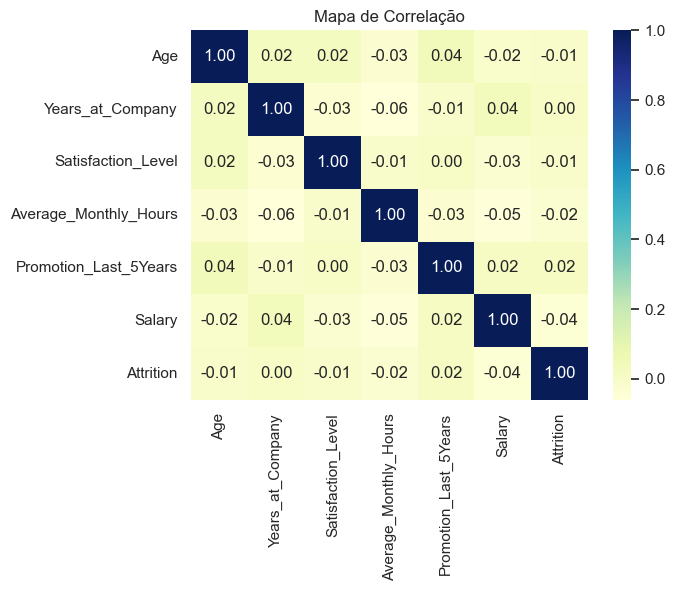

In [15]:
#Mapa de correlação
numerico_df = df_dados.select_dtypes(include=[float, int])

sns.heatmap(numerico_df.corr(),annot=True, fmt='.2f', cmap="YlGnBu",linecolor='black')
plt.title('Mapa de Correlação')
plt.show()

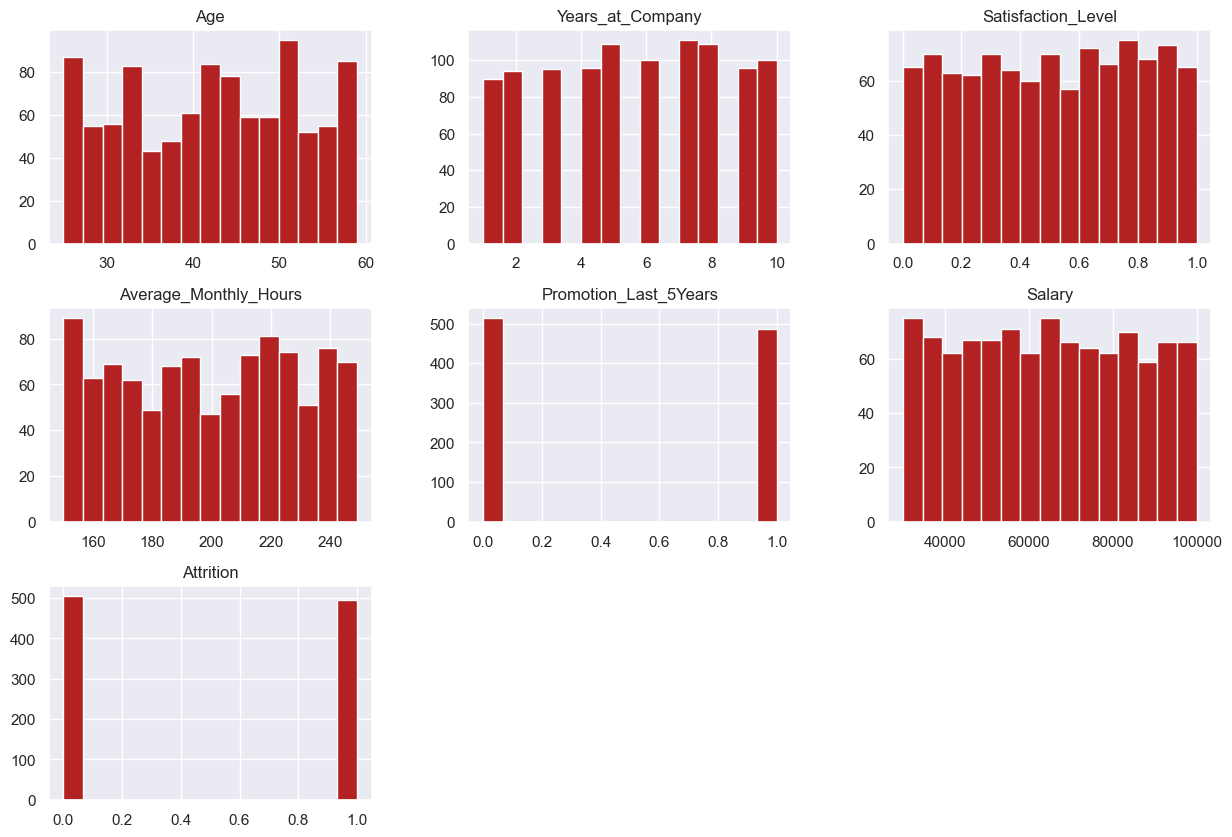

In [16]:
#Histograma das variaveis numéricas
df_dados[variaveis_numericas].hist(bins=15, figsize=(15, 10), color = 'firebrick')
plt.show()

In [17]:
# Calcular o valor de Atrittion
value_counts = df_dados['Attrition'].value_counts().reset_index()
value_counts.columns = ['Attrition', 'Count']

# Gerar o gráfico
fig = px.bar(value_counts, x='Attrition', y='Count', text='Count', title='Attrition',
             color='Attrition',width=700,height=400)

# Customizar o layout
fig.update_layout(
    xaxis_title='Attrition',
    yaxis_title='Count',
    template='plotly_dark'
)


fig.write_image("figura.png")

<img src = "figura.png">

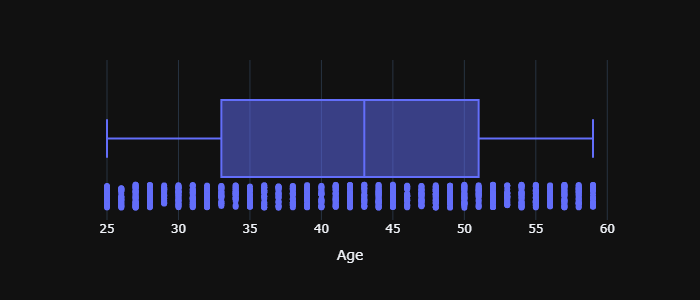

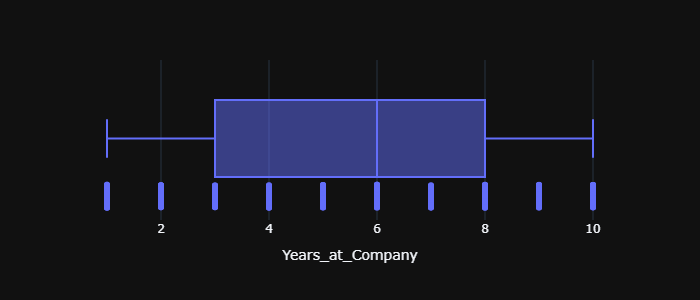

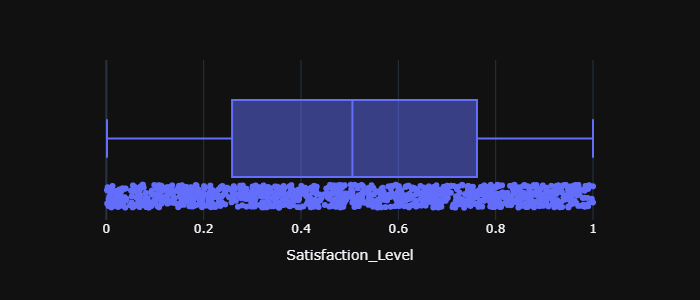

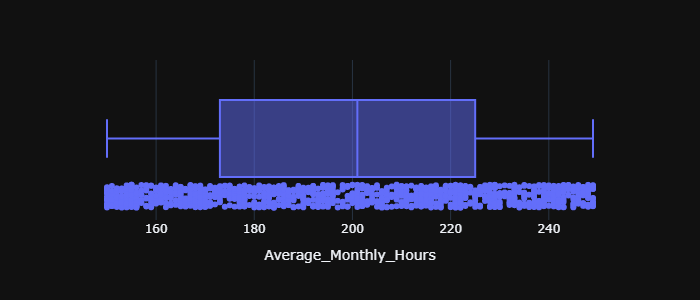

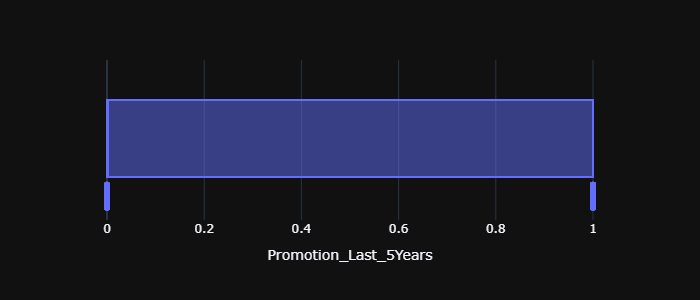

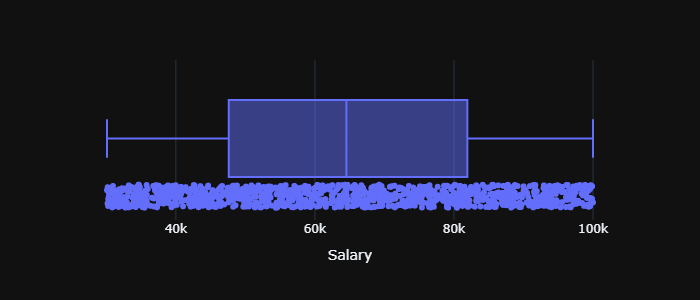

In [18]:
#Boxplot das variáveis numéricas
variaveis_numericas.pop()
i=1
# Iterar sobre as variáveis numéricas e criar as imagens
for i, col in enumerate(variaveis_numericas, start=1):
    fig = px.box(df_dados, x=col, points="all", template="plotly_dark", width=700, height=300)
    
    # Criar um nome de arquivo único para cada gráfico
    filename = f"figura_{i}.png"
    
    # Salvar a imagem
    fig.write_image(filename)
    
    # Exibir a imagem
    display(Image(filename=filename))

<img src = "figura2.png">

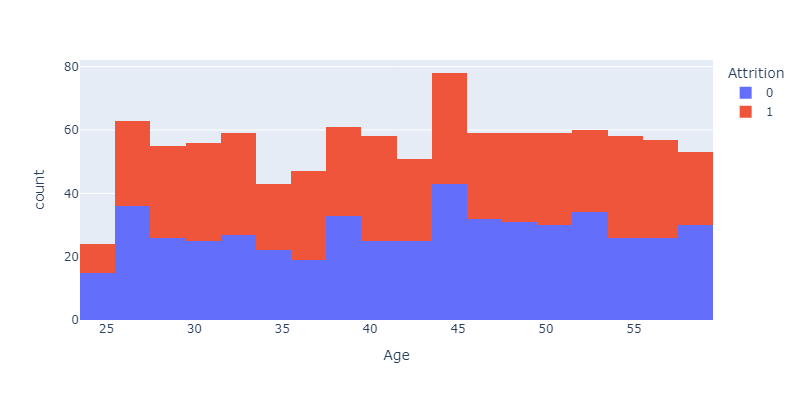

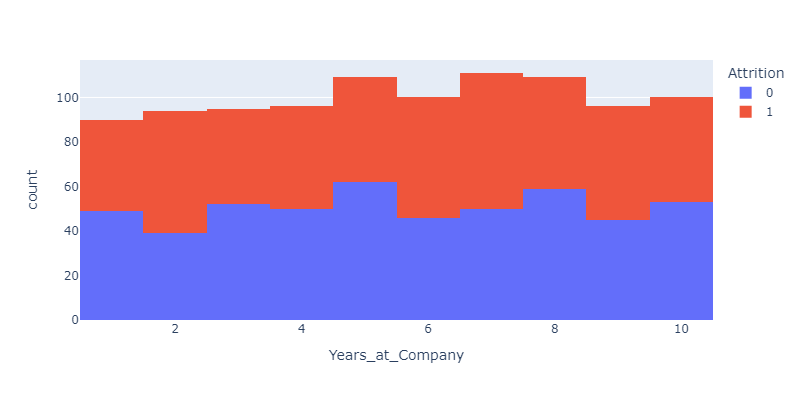

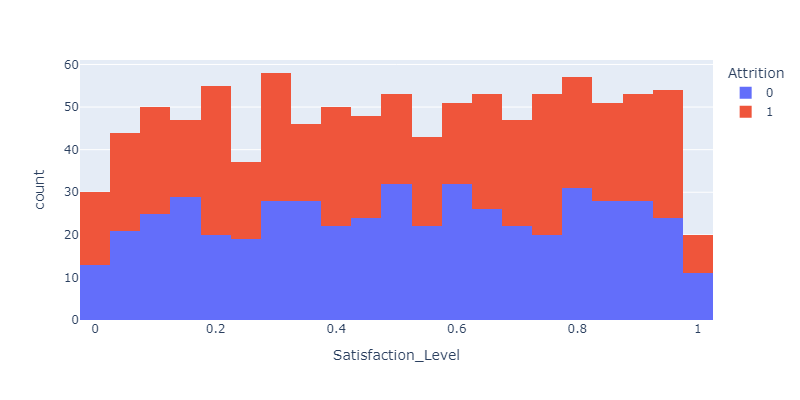

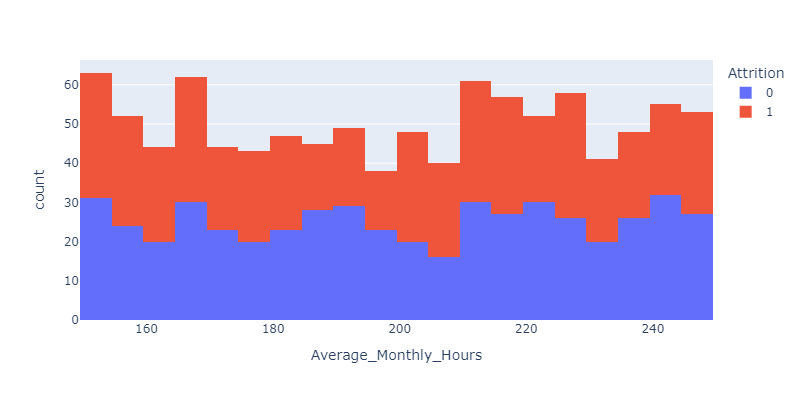

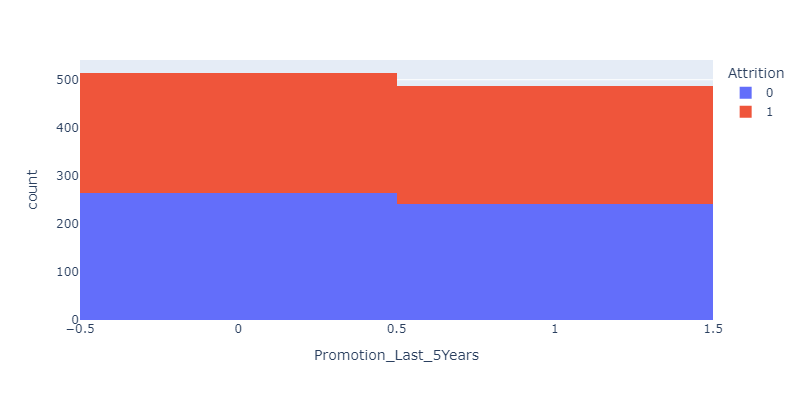

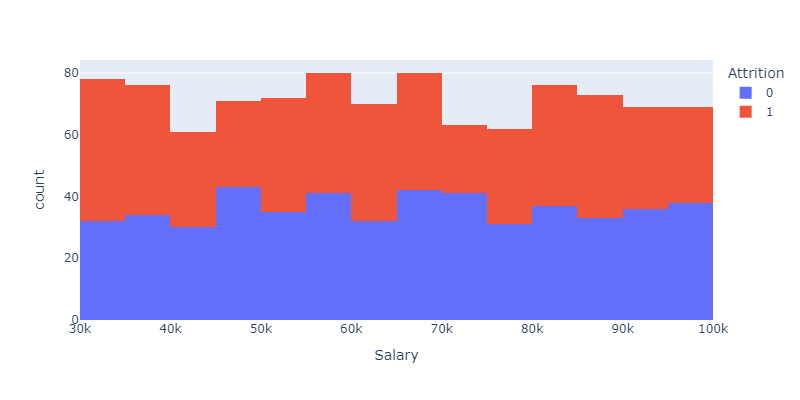

In [19]:
#Gráfico de barras empilhado com a contagem das variáveis numéricas em relação com Atrittion
i=1
for col in variaveis_numericas:
    fig = px.histogram(df_dados, col,             
                       color="Attrition",histfunc="count",width=800,height=400
                       )

    # Criar um nome de arquivo único para cada gráfico
    filename = f"figura2_{i}.png"
    
    # Salvar a imagem
    fig.write_image(filename)
    
    # Exibir a imagem
    display(Image(filename=filename))

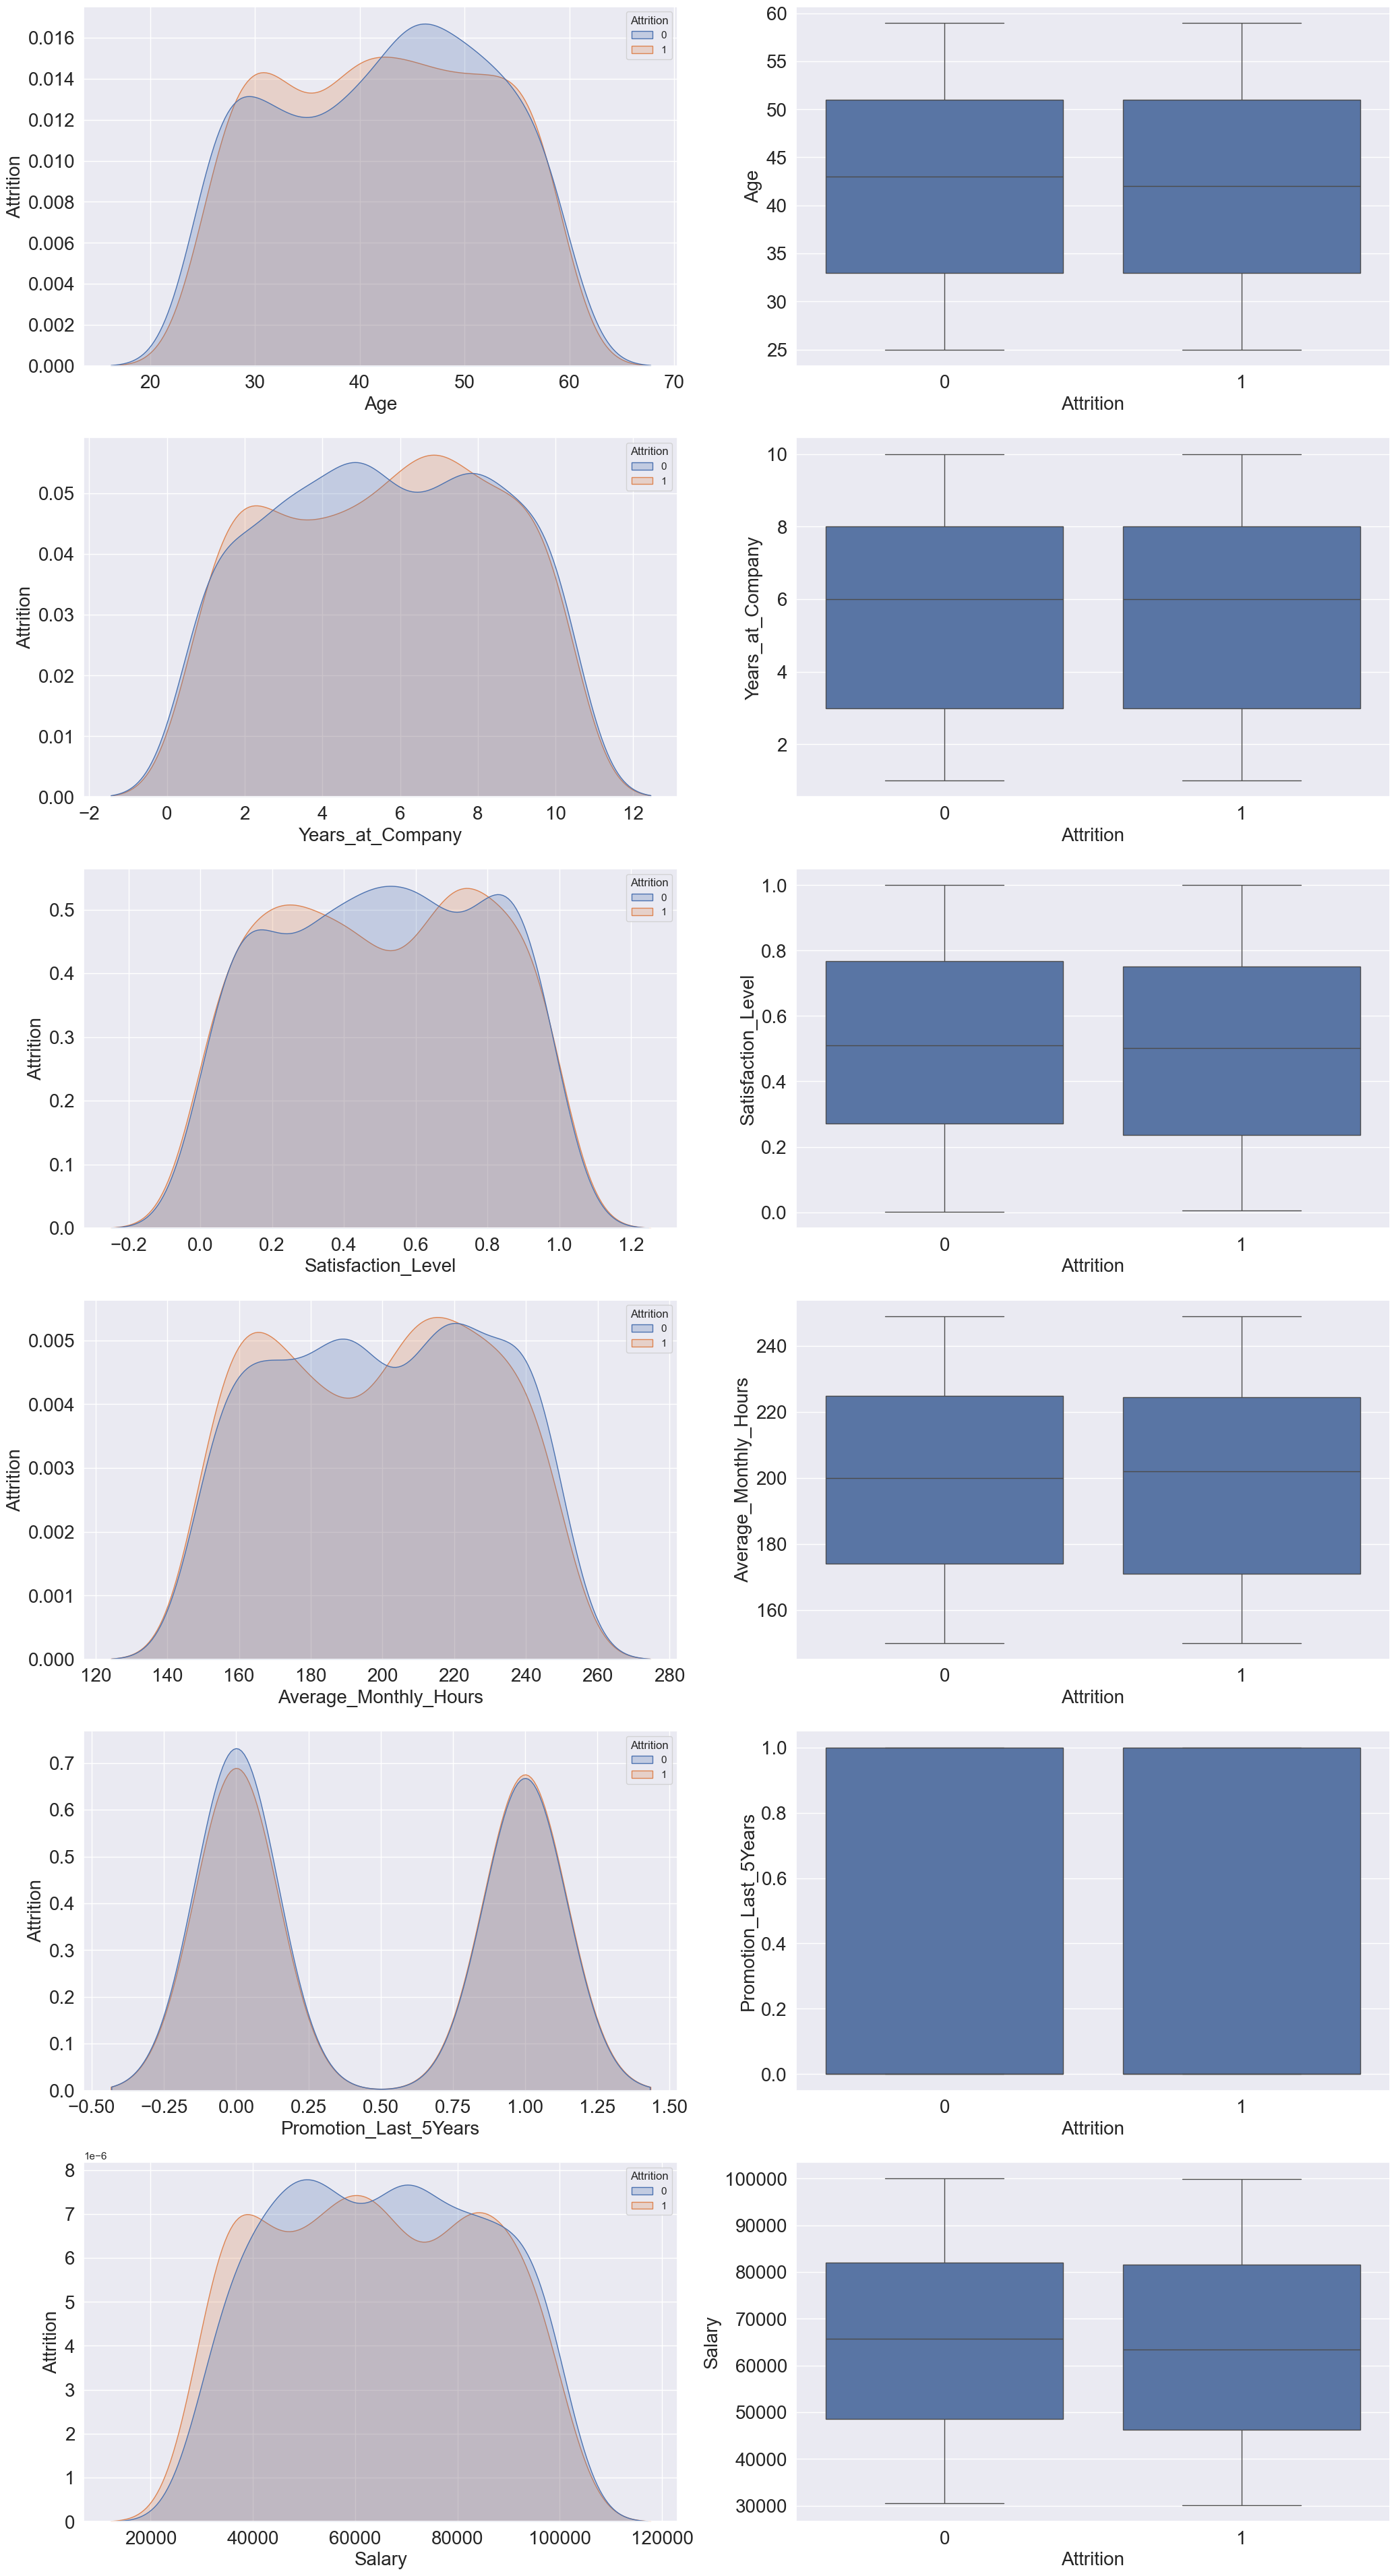

In [17]:
#Gráfico de densidade e boxplot das variáveis numéricas em relação com Atrittion
i = 1
plt.figure(figsize=(25, 90))

for col in variaveis_numericas:
    plt.subplot(11, 2, i)
    sns.kdeplot(data=df_dados, hue="Attrition", x=col, fill=True)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(col, fontsize=20)
    plt.ylabel("Attrition", fontsize=20)
    i = i + 1
    
    plt.subplot(11, 2, i)
    sns.boxplot(x="Attrition", y=col, data=df_dados)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Attrition", fontsize=20)
    plt.ylabel(col, fontsize=20)
    i = i + 1

plt.show()

# Conclusão da Análise e Recomendações
Após analisar os gráficos, concluímos que o perfil de funcionário com maior probabilidade de deixar a empresa possui as seguintes características:

Idade entre 30 e 40 anos.

Tempo de serviço entre 6 e 8 anos.

Não recebeu promoções.

Salário baixo.

Nível de satisfação baixo.

Idealmente, as horas de trabalho daqueles que permanecem na empresa estão entre 180 e 200 horas por mês.

<h3>Recomendações</h3>

Para reduzir a rotatividade e melhorar a retenção de funcionários, sugerimos as seguintes medidas:

<hr>
<h5>Valorização dos Funcionários:</h5>

Desenvolver e comunicar claramente um plano de carreira para todos os funcionários, mostrando caminhos claros para promoções e desenvolvimento profissional.

Estabelecer critérios transparentes e justos para promoções, baseados em desempenho, habilidades adquiridas e tempo de serviço.

Oferecer aumentos salariais baseados no desempenho e na contribuição do funcionário para a empresa.
<hr>

<h5>Melhoria do Ambiente de Trabalho:</h5> 

Realizar pesquisas regulares de clima organizacional para identificar áreas de insatisfação e implementar melhorias.

Promover um ambiente de trabalho saudável e positivo, oferecendo suporte emocional e físico, como programas de bem-estar e iniciativas de equilíbrio entre vida profissional e pessoal.

Estabelecer um sistema de feedback contínuo onde os funcionários possam expressar suas preocupações e sugestões.
<hr>

<h5>Ajuste das Horas de Trabalho:</h5>

Nivelar as horas de trabalho entre 180 e 200 horas mensais para garantir que os funcionários tenham um bom desempenho sem ficarem cansados.

<hr>